# Problem 8
A square plate $[-1,1]\times[-1,1]$ is at temperature $u = 0$. At time $t = 0$, the temperature is increased to $u=5$ along one of the four sides while being held at $u=0$ on the other three sides, and heat then flows into the flate according to $u_t = \Delta u$. When does the temperature reach $u=1$ at the center of the plate?

### Finite Difference Method

Note that we have by the definition of a derivative that 

$$ \frac{\partial u}{\partial t} = \lim_{\Delta t \rightarrow 0} \frac{u(x,y,t+\Delta t)-u(x,y,t)}{\Delta t}$$

so we can approxmiate $\frac{\partial u}{\partial t} $ by ignoring the limit and making $\Delta t$ sufficiently small.

Similarly, we can approximate the second derivative of a function $f(x)$ as follows:

$$\begin{align*}
&\begin{cases}
f(x+\Delta x) = f(x) + \Delta x \cdot f'(x) + \frac{(\Delta x)^2}{2!} f''(x) + \frac{(\Delta x)^3}{3!} f^{(3)}(x) + O((\Delta x)^4) \\
f(x-\Delta x) = f(x) - \Delta x \cdot f'(x) + \frac{(\Delta x)^2}{2!} f''(x) - \frac{(\Delta x)^3}{3!} f^{(3)}(x) + O((\Delta x)^4) 
\end{cases} \\
&\; \implies f(x+\Delta x) + f(x-\Delta x) = 2f(x) + (\Delta x)^2 f''(x) + O((\Delta x)^4) 
\end{align*}$$
Therefore, we have that $$ \frac{d^2 f}{d x^2} = \lim_{\Delta x \rightarrow 0} \frac{f(x + \Delta{x}) - 2f(x) + f(x-\Delta x)}{(\Delta x)^2}$$

We can use these approximations to discretize the given problem. 


The following code snippet plots the temperature at the center of the plate (More information and the code that this is modified from can be found [here](https://lorenabarba.com/blog/cfd-python-12-steps-to-navier-stokes/#:~:text=The%20module%20is%20called%20%2212%20steps%20to%20Navier-Stokes,her%20students%20over%20several%20semesters%20teaching%20the%20course.)):

100%|██████████████| 50000/50000 [00:39<00:00, 1280.28it/s]


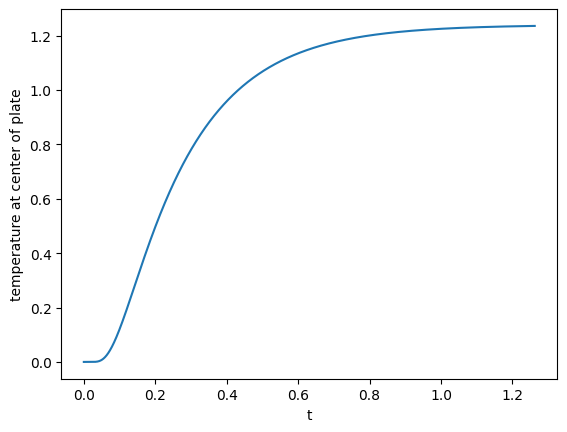

(0.43256483422135805, 1.0000113247900924)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
nx = ny = 200
nu = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = 0.25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.zeros((ny, nx))
un = np.zeros((ny, nx))

time_elapsed = []
center_temp = []

for i in tqdm.tqdm(range(50000)):
    un = u.copy()
    u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                    nu * dt / dx**2 * 
                    (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                    nu * dt / dy**2 * 
                    (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    u[0,:] = 5
    u[-1,:] = 0
    u[:,0] = 0
    u[:,-1] = 0
    time_elapsed.append(dt*i)
    center_temp.append(u[nx//2,ny//2])
plt.plot(time_elapsed, center_temp)
plt.xlabel("t"), plt.ylabel("temperature at center of plate")
plt.show()
print(min([(time_elapsed[i], center_temp[i]) for i in range(len(time_elapsed))], key = lambda x: abs(1-x[1])))

We can also [modify the above code](https://gist.github.com/epistemologist/be48d103bc230b99655a3db79df46de3) to plot the temperature of the whole plate:

In [2]:
from IPython.display import HTML

HTML("""
    <video width=50% height=auto alt="test" controls>
        <source src="hot_plate.mp4" type="video/mp4">
    </video>
""")

### Attempt 2: Fourier Series

The posed problem is a typical example of one that is well-suited for a solution using Fourier analysis (see for example "Fourier Transforms" by Sneddon p185 whose exposition we will closely follow), and this method was how it was solved by [one team](https://matheplanet.com/matheplanet/nuke/html/matroid/siam/siam_results.pdf)

![Figure 1](media/prob8/fig1.png)




We want a function $ u(x,y,t): [0, a] \times [0, b] \times \mathbb{R}_{\ge 0} \to \mathbb{R} $ that represents the temperature at a point $(x,y)$ on the rectangle at any given time $t > 0$. We solve for $u$ satisfying a more general situation and then plug in values specific to the given question.

Let $ u(x,y,t) $ satisfy the partial differential equation with corresponding boundary conditions:

$$\kappa \left(\frac{\partial^2u}{\partial{x^2}} + \frac{\partial^2u}{\partial{y^2}}\right) = \frac{\partial{u}}{\partial{t}}, \;\;\; \begin{cases} u(x,0,t) = f(x) \\ u(0,y,t) = u(a,y,t) = 0 \\ u(x,b,t) = 0 \\ u(x,y,0) = 0  \end{cases} $$

Next, we have by repeated integration by parts that

$$ \begin{align*} 
&\int_0^b \left( dy \; \frac{\partial^2{u}}{\partial{y^2}} \right) \left( \sin{\left(\frac{\pi n y}{b}\right)}\right) \\ 
&= \left( \sin{\left( \frac{\pi n y}{b}\right)} \frac{\partial{u}}{\partial{y}} \right)\Big|_{y=0}^{y=b} - \frac{\pi n}{b} \left( \cos{\left( \frac{\pi n y}{b}\right)} u\right)\Big|_{y=0}^{y=b} - \frac{\pi^2 n^2}{b^2} \int_0^b \sin{\left(\frac{\pi n y}{b}\right)} \; u \; dy \\
&= 0 - \frac{\pi n}{b} \left( \cos{(n \pi)} u \Big|_{y=b} - u\Big|_{y=0}\right)-\frac{\pi^2 n^2}{b^2} \int_0^b \sin{\left(\frac{\pi n y}{b}\right)} \; u \; dy \\
&= \frac{\pi n}{b} f(x) - \frac{\pi^2 n^2}{b^2} \int_0^b \sin{\left(\frac{\pi n y}{b}\right)} \; u \; dy
\end{align*}$$

Multiplying both sides of this equation by $\sin{\left( \frac{\pi m x }{a}\right)}$ and integrating both sides from $x = 0$ to $a$, we get:

$$ \int_0^a \int_0^b \frac{\partial^2 u}{\partial y^2} \sin{\left(\frac{\pi m x}{a}\right)} \sin{\left(\frac{\pi n y}{b}\right)} dy dx = \\ \frac{\pi n}{b} \underbrace{\int_0^a f(x)\sin{\left(\frac{\pi m x}{a}\right)}dx}_{:=F_s(m)}  - \frac{\pi^2 n^2 }{b^2} \underbrace{\int_0^a \int_0^b dy \; dx \; u(x,y,t) \sin{\left(\frac{\pi m x}{a}\right)} \sin{\left(\frac{\pi n y}{b}\right)}}_{:=U(m,n,t)}  $$ 

Similarly, we have that

$$ \begin{align*}
\int_0^a &dx \frac{\partial^2 u}{\partial x^2} \sin{\left(\frac{\pi m x}{a}\right)}  \\
&= \left( \sin{\left( \frac{\pi m x}{a}\right)} \frac{\partial u}{\partial x} \right)\Big|_{x=0}^{x=a} - \frac{\pi m}{a} \left( \cos{\left( \frac{\pi m x}{a} \right)} u \right) \Big|_{x=0}^{x=a} - \frac{\pi^2 m^2}{a^2} \int_0^a dx \; u \sin{\left( \frac{\pi m x}{a} \right)} \\
&= - \frac{\pi^2 m^2}{a^2} \int_0^a dx \; u \sin{\left( \frac{\pi m x}{a} \right)} \\
\end{align*}
$$
and therefore:
$$
\begin{align*}
\implies \int_0^b dy \int_0^a dx \left( \frac{\partial^2 u}{\partial x^2} \sin{\left(\frac{\pi m x}{a}\right)} \sin{\left( \frac{\pi n y}{b} \right)} \right) &= - \frac{\pi^2 m^2}{a^2} \int_0^b dy  \int_0^a  dx \; u \sin{\left( \frac{\pi m x}{a} \right)} \sin{\left( \frac{\pi n y}{b} \right)} \\
&= - \frac{\pi^2 m^2}{a^2} U(m,n)
\end{align*}$$

Returning to the original differential equation, we have:
$$ \begin{align*}
\kappa \left(\frac{\partial^2u}{\partial{x^2}} + \frac{\partial^2u}{\partial{y^2}}\right) &= \frac{\partial{u}}{\partial{t}} \\
\implies \kappa \sin{\left(\frac{\pi m x}{a}\right)}\sin{\left(\frac{\pi n y}{b}\right)}  \left( \frac{\partial^2u}{\partial{x^2}} + \frac{\partial^2u}{\partial{y^2}}\right) &= \sin{\left(\frac{\pi m x}{a}\right)}\sin{\left(\frac{ \pi n y}{b}\right)} \left( \frac{\partial u}{\partial t}\right)\\
\implies \kappa \iint_{{0 \le x \le a} \\ {0 \le y \le b}} dA \sin{\left(\frac{\pi m x}{a}\right)}\sin{\left(\frac{ \pi n y}{b}\right)}  \left( \frac{\partial^2u}{\partial{x^2}} + \frac{\partial^2u}{\partial{y^2}}\right) &=  \iint_{{0 \le x \le a} \\ {0 \le y \le b}} dA \sin{\left(\frac{\pi m x}{a}\right)}\sin{\left(\frac{\pi n y}{b}\right)} \left( \frac{\partial u}{\partial t}\right)
\end{align*}$$

The left-hand side splits into the two integrals we have calculated above, and the right hand side is $\frac{\partial U}{\partial t}$ by [differentiation under the integral sign](https://en.wikipedia.org/wiki/Leibniz_integral_rule). We therefore have the following first-order differential equation for $U$ with corresponding boundary condition:

$$\frac{\partial U}{\partial t} + \kappa \pi^2 \left(\frac{m^2}{a^2} + \frac{n^2}{b^2}\right) U = \frac{\kappa n \pi}{b} F_s(m), \; U(m,n,0) = 0 $$ 

Substituing known constants from the problem, we have that $\kappa = 1, a = b = 2, $ and $ f(x) = 5 \implies F_s(m) = \int_0^a 5 \sin{(\frac{m\pi x}{2})}dx = \frac{20 \sin^2{(\frac{\pi m}{2}})}{\pi m} $.

In [3]:
from sympy import symbols, Function, Derivative, Eq
import sympy as sp

m,n = symbols("m n", integer=True)
t = symbols("t", real=True)
U = Function("U")(t)

k = 1
a = 2; b = 2

F_s = 20 * sp.sin(sp.pi * m / 2)**2 / (sp.pi * m)

# Solve for U
diff_eq = Eq(Derivative(U, t) + k * sp.pi**2 * (m**2/a**2 + n**2/b**2) * U, k*n*sp.pi/b * F_s)
solution = sp.dsolve(diff_eq).rhs
# Solve for boundary condition (U(t=0) = 0)
constant = sp.solve(solution.subs(t, 0))
# Update solution with value of arbitrary constant
solution = sp.simplify(solution.subs(*constant))

assert sp.simplify(diff_eq.subs({U: solution}))

solution

20*n*((-1)**m + ((-1)**(m + 1) + 1)*exp(pi**2*t*(m**2 + n**2)/4) - 1)*exp(-pi**2*t*(m**2 + n**2)/4)/(pi**2*m*(m**2 + n**2))

##### Inverse Fourier Transform

Let $F(m,n) = \int_0^2 \int_0^2 f(x,y) \sin{(\frac{\pi m x}{2})} \sin{(\frac{\pi n y}{2})} dx dy $ and assume $$f(x,y) = \sum_{(m',n')\in \mathbb{N}^2 } a_{m'n'} \sin{\left(\frac{\pi m' x}{2}\right)} \sin{\left(\frac{\pi n' y}{2}\right)} $$

We therefore have

$$\begin{align*}F(m,n) &= \int_0^2 \int_0^2 dx dy \sum_{(m',n')\in \mathbb{N}^2 } a_{m'n'} \sin{\left(\frac{m' \pi x}{2}\right)} \sin{\left(\frac{n'\pi y}{2}\right)} \\
&= \sum_{(m',n') \in \mathbb{N}^2 }  a_{m'n'} \left( \int_0^2 \sin{\left(\frac{m \pi x}{2}\right)} \sin{\left(\frac{m' \pi x}{2}\right)} dx\right) \left( \int_0^2 \sin{\left(\frac{n \pi y}{2}\right)} \sin{\left(\frac{n' \pi y}{2}\right)} dy \right) \\
&= \sum_{(m',n') \in \mathbb{N}^2 } a_{m'n'} \delta_{mm'} \delta_{nn'} = a_{mn}\end{align*} $$


We therefore have that $$ \begin{align*} u(x,y,t) &= \sum_{m,n > 0} U(m,n,t) \sin{\left(\frac{\pi m' x}{2}\right)} \sin{\left(\frac{\pi n' y}{2}\right)} \\ &= \sum_{m=1}^\infty \sum_{n=1}^\infty \frac{20 n e^{- \frac{\pi^{2} t}{4} \left(m^{2} + n^{2}\right)}}{\pi^{2} m \left(m^{2} + n^{2}\right)} \left(\left(-1\right)^{m} + \left(- \left(-1\right)^{m} + 1\right) e^{\frac{\pi^{2} t}{4} \left(m^{2} + n^{2}\right)} - 1\right)
\sin{\left(\frac{m \pi x}{2}\right)} \sin{\left(\frac{n \pi y}{2}\right)} \end{align*}$$

Let $c(t) = u(1,1,t)$ be the temperature of the middle of the plate at time $t$. We have:


$$ c(t) = \sum_{m=1}^\infty \sum_{n=1}^\infty \frac{20 n e^{- \frac{\pi^{2} t}{4} \left(m^{2} + n^{2}\right)}}{\pi^{2} m \left(m^{2} + n^{2}\right)} \left(\left(-1\right)^{m} + \left(- \left(-1\right)^{m} + 1\right) e^{\frac{\pi^{2} t}{4} \left(m^{2} + n^{2}\right)} - 1\right)
\sin{\left(\frac{m \pi}{2}\right)} \sin{\left(\frac{n \pi}{2}\right)}  $$

Noting that the terms corresponding to odd $m$ and $n$ contribute to the sum, we let $m \mapsto 2k+1, n \mapsto 2l+1$, leaving us with the following:

In [4]:
k,l = symbols("k l", integer=True)

summand = (solution*sp.sin(m*sp.pi/2)*sp.sin(n*sp.pi/2)).subs({m: 2*k+1, n: 2*l+1})

sp.simplify(summand, ratio=2.5)

40*(-1)**(k + l + 1)*(1 - exp(pi**2*t*((2*k + 1)**2 + (2*l + 1)**2)/4))*(2*l + 1)*exp(-pi**2*t*((2*k + 1)**2 + (2*l + 1)**2)/4)/(pi**2*(2*k + 1)*((2*k + 1)**2 + (2*l + 1)**2))

However, the summand as is is numerically unstable due to the exponential term containing a large exponent - to remedy this, we rewrite it to ignore this term to get:

$$ c(t) = \frac{40}{\pi^2} \sum_{k>0} \frac{(-1)^k}{2k+1} \sum_{l>0} \frac{(-1)^l(2l+1)}{(2k+1)^2 + (2l+1)^2}\left( 1 - e^{\frac{-\pi^2 t}{4}((2k+1)^2 + (2l+1)^2) } \right) $$

We use standard root-finding techniques to find the time $\hat{t}$ such that $c(t) = 1$

In [5]:
from math import exp, pi
summand_fn = lambda k,l,t: (40 * pow(-1, k+l) * (2*l+1) * (1 - exp(-pi**2*t*((2*k+1)**2 + (2*l+1)**2)/4))) / (pi**2 * (2*k+1) * ((2*k+1)**2 + (2*l+1)**2))
INFINITY = 1000
c = lambda t: sum([summand_fn(k,l,t) for k in range(INFINITY) for l in range(INFINITY)])
from scipy.optimize import root_scalar
def f(t):
    print(t)
    return c(t)-1
%time root_scalar(f, x0=0.4, x1=0.6, rtol=1e-8)

0.4
0.6
0.436506478770665
0.418735624237873
0.42483118120699204
0.42466025478039293
0.4246577393016545
CPU times: user 20.9 s, sys: 156 ms, total: 21.1 s
Wall time: 21.2 s


      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 0.424657740374531

Note that this only gives 3 accurate digits; note that the inner sum decays like $O(l^{-1})$ and therefore, to get an error of $10^{-10}$ we would need to sum the series for $0 < k,l < 10^{10}$ for a total of $10^{100}$ terms - we get around this by solving this sum analytically

We can break apart the sum to get rid of the part that does not decay quickly enough:

$$ \begin{align*}
c(t) &= \frac{40}{\pi^2} \sum_{k,l>0} \frac{(-1)^{k+l} (2l+1)}{(2k+1)((2k+1)^2 + (2l+1)^2)} \left( 1 - e^{\frac{-\pi^2 t}{4}((2k+1)^2 + (2l+1)^2) } \right) \\
&= \frac{40}{\pi^2} \left( \underbrace{ \sum_{k,l>0} \frac{(-1)^{k+l} (2l+1)}{(2k+1)((2k+1)^2 + (2l+1)^2)}}_{S} - \sum_{k,l>0} \frac{(-1)^{k+l} (2l+1) e^{\frac{-\pi^2 t}{4}((2k+1)^2 + (2l+1)^2) }}{(2k+1)((2k+1)^2 + (2l+1)^2)} \right) 
\end{align*}$$

We continue by analytically solving for the sum $S$

##### A Weird Sum

We consider the following related sum

$$\sum_{n=0}^\infty \frac{(-1)^n (2n+1)}{(2n+1)^2 - a^2}$$

Using partial fractions, we can split the sum and represent it as an integral:
$$\begin{align*}\sum_{n=0}^\infty \frac{(-1)^n (2n+1)}{(2n+1)^2 - a} &= \sum_{n=0}^\infty (-1)^n \left( \frac{1}{4n+2-2a} + \frac{1}{4n+2+2a}\right)\\
&= \sum_{n=0}^\infty (-1)^n \int_0^1 (x^{4n+1-2a} + x^{4n+1+2a}) dx \\
&= \int_0^1 \left(\sum_{n=0}^\infty (-1)^n x^{4n+1}\right) (x^{2a} + x^{-2a}) dx \\
&= \int_0^1 \frac{x}{1+x^4} (x^{2a} + x^{-2a}) dx = \int_0^1 \frac{x^{2a+1}}{1+x^4} dx + \underbrace{\int_0^1 \frac{x^{1-2a}}{1+x^4} dx}_{x'=\frac{1}{x}, \; dx=-(x')^{-2} dx'} \\
&= \int_0^1 \frac{x^{2a+1}}{1+x^4} dx + \int_{x'=\infty}^{x'=1} \frac{(x')^{2a-1}}{1+(x')^{-4}} \cdot \frac{dx'}{-(x')^2} \cdot \frac{x'^2}{x'^2} \\
&= \int_0^1 \frac{x^{2a+1}}{1+x^4} dx + \int_1^\infty \frac{(x')^{2a+1}}{1+x^4} dx' \\
&= \int_0^\infty \frac{x^{2a+1}}{1+x^4}dx
\end{align*}$$



We can evaluate this integral with `sympy`

In [6]:
x, a = symbols('x a')
sp.integrate(x**(2*a+1) / (1 + x**4), (x, 0, sp.oo))

Piecewise((pi/(4*cos(pi*a/2)), (re(a) > -1) & (re(a) < 1)), (Integral(x**(2*a + 1)/(x**4 + 1), (x, 0, oo)), True))

Substituting in $ a = i k $ for some $ k \in \mathbb{R}$ , we therefore have:

$$\sum_{n=0}^\infty \frac{(-1)^n (2n+1)}{(2n+1)^2 - (ik) ^2} = \sum_{n=0}^\infty \frac{(-1)^n (2n+1)}{(2n+1)^2 + k^2} = \frac{\pi}{4 \cos{\left(\frac{\pi i k}{2}\right)}} = \frac{\pi}{4} \text{sech}\left( \frac{\pi k}{2}\right)$$

We can also confirm this numerically:

In [7]:
import numpy as np
from math import pi

f = lambda a: sum([pow(-1,n) * (2*n+1) / ((2*n+1)**2 + a**2) for n in range(1000000)])
g = lambda a: pi/4 * 1/(np.cosh(pi*a/2))

x = np.arange(0, 100)
assert np.allclose(f(x), g(x), atol=1e-6)

##### Interlude: Another Weird Sum

We now consider the sum 
$$\sum_{k=0}^\infty \frac{(-1)^k}{2k+1} \text{sech}\left(\pi \left(k + \frac{1}{2}\right)\right)$$

We numerically calculate this sum and use the [PSLQ algorithm](https://en.wikipedia.org/wiki/Integer_relation_algorithm) to identify what its value is.

In [8]:
from math import cosh, pi
sech = lambda t: 1/cosh(t)
INFINITY = 50

from mpmath import identify
identify(sum([pow(-1,k)/(2*k+1)*sech(pi*(k+0.5)) for k in range(INFINITY)]),["pi","e"])

'((1/8)*pi)'

In [9]:
sum([pow(-1,k)/(2*k+1)*sech(pi*(k+0.5)) for k in range(INFINITY)]) - pi/8

0.0

We therefore have that

$$\sum_{k=0}^\infty \frac{(-1)^k}{2k+1} \text{sech}\left(\pi \left(k + \frac{1}{2}\right)\right) = \frac{\pi}{8}$$ to machine precision.

**EXERCISE**: Prove this identity.

Going back to our original sum, we have:

$$\begin{align}S &= \sum_{k, l \ge 0 } \frac{\left(-1\right)^{k} \left(-1\right)^{l} \left(2 l + 1\right)}{ \left(2 k + 1\right) \left(\left(2 k + 1\right)^{2} + \left(2 l + 1\right)^{2}\right)} \\
&= \sum_{k \ge 0} \frac{ (-1)^k }{(2k+1)}\left( \sum_{l \ge 0} \frac{(-1)^l (2l+1)}{(2l+1)^2 + (2k+1)^2} \right) \\
&= \sum_{k \ge 0} \frac{ (-1)^k }{(2k+1)}\left( \frac{\pi}{4} \text{sech}\left( \frac{\pi (2k+1)}{2} \right) \right) \\
&= \frac{\pi}{4} \sum_{k \ge 0} \frac{(-1)^k}{2k+1} \text{sech}\left(\pi \left(k + \frac{1}{2}\right)\right) \\
&= \frac{\pi}{4} \cdot \frac{\pi}{8} = \frac{\pi^2}{32}
\end{align}$$

We therefore have that the original series for $c(t)$ becomes:

$$\begin{align}
c(t) &= \frac{40}{\pi^2} \left( \frac{\pi^2}{32} - \sum_{k,l>0} \frac{(-1)^{k+l} (2l+1) e^{\frac{-\pi^2 t}{4}((2k+1)^2 + (2l+1)^2) }}{(2k+1)((2k+1)^2 + (2l+1)^2)} \right) \\
&= \frac{5}{4} - \frac{40}{\pi^2} \sum_{k,l>0} \frac{(-1)^{k+l} (2l+1) e^{\frac{-\pi^2 t}{4}((2k+1)^2 + (2l+1)^2) }}{(2k+1)((2k+1)^2 + (2l+1)^2)} 
\end{align}$$

Note that the summand now decays exponentially - therefore, we can expect much better convergence

In [10]:
from math import pi, exp
from scipy.optimize import root_scalar
INFINITY = 1000
def u(t):
    print(t)
    return 5/4 - 40/(pi*pi)*sum([
        (-1)**k / (2*k+1) * sum([
            (-1)**l * (2*l+1) / ((2*k+1)**2 + (2*l+1)**2) * exp(-pi**2/4*t*((2*k+1)**2 + (2*l+1)**2))
        for l in range(INFINITY)])
    for k in range(INFINITY)])

%time root_scalar(lambda t: u(t)-1, x0=0, x1=1)

0.0
1
0.80931445650583
0.6672977947075767
0.012917560648138685
0.5699635631325781
0.5066108579750871
0.3879039493608965
0.4315845329426156
0.42466744818111046
0.4239990812124808
0.42401140690307043
0.42401138703428987
CPU times: user 30.8 s, sys: 28.8 ms, total: 30.9 s
Wall time: 31.7 s


      converged: True
           flag: 'converged'
 function_calls: 13
     iterations: 12
           root: 0.42401138703368835

### Reducing Dimensionality of the Problem

(Reference note: here, we mostly follow the exposition as used in Bornemann's book, Section 8.3)

Firstly, we define some notation
*   Let $P := \{(x,y): -1\le x,y \le 1\}$ be the square plate
*   Let $\partial P = \{(x,y): x \in \{-1,1\} \text{ or } y \in \{-1,1\}\}$ be the boundary of the square plate

![Figure 2](media/prob8/fig2.png)

Following the exposition in Bornemann's book, we reduce the problem from a two-dimensional one to a one-dimensional one as follows: 

Note that since we are only asked about the temperature at the center of the plate, we have that we can hold any of the sides of the plate at $u = 5$ and still get the same temperature distribution at the center of the plate.

By linearity of these solutions and averaging the solutions where each side is set to $u = 5$, we get that we can also set $u(x,y,t)|_{(x,y) \in \partial P}=5/4$ as an equivalent boundary condition to the given problem.


![Figure 3](media/prob8/fig3.png)

Next, let $\hat{u}(x,y,t) = 5/4 - u(x,y,t)$. 

Changing our boundary conditions, we have:

$$ \begin{cases} u(x,y,t)|_{(x,y)\in\partial{P}} = \frac{5}{4} \\ u|_{t=0} = 0 \end{cases} \implies  \begin{cases}  \hat{u}(x,y,t)|_{(x,y)\in\partial{P}} = 0 \\ \hat{u}|_{t=0} = \frac{5}{4}  \end{cases} $$

We next use seperation of variables and assume that $\hat{u}(x,y,t) = f(x,t)f(y,t) $. Substituting back into the original differential equation, we get:

$$ \begin{align}
\frac{\partial{\hat{u}}}{\partial{t}} &= \frac{\partial^2{\hat{u}}}{\partial x^2} + \frac{\partial^2{\hat{u}}}{\partial y^2} \\
\implies \frac{\partial}{\partial t} \left( f(x, t) \cdot f(y,t) \right) &= \frac{\partial^2}{\partial x^2} \left( f(x, t) \cdot f(y,t) \right) + \frac{\partial^2}{\partial y^2} \left( f(x, t) \cdot f(y,t) \right) \\
\implies \frac{\partial}{\partial t} f(x,t) \cdot f(y,t) + f(x,t) \cdot \frac{\partial}{\partial t} f(y,t) &= \frac{\partial^2}{\partial x^2} f(x,t) \cdot f(y,t) + f(x,t) \cdot \frac{\partial^2}{\partial y^2} f(y,t) \\
\implies f(x,t) \left( \frac{\partial}{\partial t} f(y,t) - \frac{\partial^2}{\partial y^2} f(y,t)\right) + f(y,t) \left(\frac{\partial}{\partial t} f(x,t) - \frac{\partial^2}{\partial x^2} f(x,t)  \right) &= 0
\end{align}$$

Note that since $f$ is non-zero, we therefore must have that $\frac{\partial}{\partial t} f(x,t) = \frac{\partial^2}{\partial x^2} f(x,t)$. 

To make some of the working out nicer, we shift the $x$ interval to be $[0,2]$. We therefore have the following boundary conditions: 

$$ f(0, t) = f(2, t) = 0 \\ f(x, 0) = \sqrt{\frac{5}{4}}$$

To solve our given problem, we attempt to find a time $\hat{t}$ such that $ f(1, \hat{t}) = \sqrt{\frac{5}{4} - 1} = \frac{1}{2} $.

We proceed with the standard method of solving this PDE; we use separation of variables again and assume that $f(x,t) = X(x)T(t)$. Therefore, we have:

$$\frac{T'}{T} = \frac{X''}{X} = k \implies \cases{T' = kT \\ X'' = k X } $$


Note that $k \not< 0$ as if so, we would have $X'' = kX \implies X = c_1 e^{\sqrt{k}x} + c_2 e^{-\sqrt{k}x}$ for some arbitrary $c_1, c_2 \in \mathbb{R}$. 

Solving the boundary conditions, we get that $\begin{cases} c_1 + c_2 = 0 \\ c_1 e^{2 \sqrt{k}} + c_2 e^{-2\sqrt{k}} = 0  \end{cases} \implies c_1 = c_2 = 0 $ yielding a trivial solution. 

We also have $k \ne 0$ as if so, we would have $X'' = 0 \implies X = c_1 x + c_2$. 

Solving for the boundary conditions again, we get $\begin{cases} c_2 = 0 \\ c_1 \cdot 2 + c_2 = 0 \end{cases} \implies c_1 = c_2 = 0$ again yielding a trivial solution.

Therefore, we have that $ k < 0 $ and so we write $k = - \lambda ^2 $. We get

$$ T'(t) = -\lambda^2 T(t) \implies T(t) = c e^{-\lambda^2 t} \\ X''(x) = -\lambda^2 X(x) \implies X(x) = c_1 \cos{(\lambda x)} + c_2 \sin{(\lambda x)} $$

Note that we have that $f(0, t) = f(2, t) = 0 \implies X(0) = X(2) = 0$. We solve for these boundary conditions:

$$ 0 = X(0) = c_1 \cos{(\lambda x)} \implies c_1 = 0 \\ 0 = X(2) = c_2 \sin{(2 \lambda)} \implies \lambda = \frac{\pi n}{2}, n \in \mathbb{Z} $$.

We therefore have a Fourier series expansion for $f$:

$$ f(x,t) = \sum_{n \ge 0} c_n \sin{\left( \frac{\pi n x}{2}\right)} e^{-\frac{\pi^2 n^2 t}{4}} $$

We use the last boundary condition $f(x, 0) = \frac{\sqrt{5}}{2} $ to get the form of the coefficients $c_n$

$$ \begin{align}
f(x, 0) = \frac{\sqrt{5}}{2} &= \sum_{n \ge 0} c_n \sin{\left( \frac{\pi n x}{2}\right)} \\
\implies \int_0^2 \sin{\left(\frac{\pi m x}{2}\right)} \cdot  \frac{\sqrt{5}}{2} dx &= \int_0^2 \sum_{n \ge 0} c_n \sin{\left( \frac{\pi n x}{2}\right)} \sin{\left(\frac{\pi m x}{2}\right)} dx & (m \in \mathbb{Z} )\\
\implies \frac{\sqrt{5}}{2} \cdot \frac{2 - 2 \cos{(m \pi)}}{m \pi} &= \sum_{n \ge 0} c_n \left( \int_0^2 \sin{\left( \frac{\pi n x}{2}\right)} \sin{\left(\frac{\pi m x}{2}\right)} dx \right) = \sum_{n \ge 0} c_n \delta_{mn} = c_m
\end{align} $$

We can simplify this further as $m$ is an integer

In [11]:
m = symbols('m', integer=True, positive=True)
sp.simplify(sp.sqrt(5)/2 * (2 - 2*sp.cos(m*sp.pi)) / (m*sp.pi) )

sqrt(5)*(1 - (-1)**m)/(pi*m)

Note that we have that $c_n = 0$ when $n$ is even. We can therefore sum over odd $n$ - our sum therefore becomes:

$$  f(x,t) = \sum_{n \ge 0}  \frac{2 \sqrt{5}}{(2n+1)\pi} \sin{\left( \frac{\pi (2n+1) x}{2}\right)} e^{-\frac{\pi^2 (2n+1)^2 t}{4}}  $$

Substituting in $x = 1$, we have:

$$ f(1,t) = \sum_{n \ge 0}  \frac{2 \sqrt{5}}{(2n+1)\pi} \sin{\left( \frac{\pi (2n+1) }{2}\right)} e^{-\frac{\pi^2 (2n+1)^2 t}{4}} = \frac{2 \sqrt{5}}{\pi} \sum_{n \ge 0} \frac{(-1)^n}{2n+1} e^{-\frac{\pi^2 (2n+1)^2 t}{4}} $$

Here, the summand exponentially decays and therefore converges quickly enough for a few terms of the series to be accurate to 10 digits.

In [12]:
from math import sqrt, exp, pi
from scipy.optimize import root_scalar
INFINITY = 10000

# mp.dps = 500
def u(t):
    print(t)
    return 2*sqrt(5)/pi * sum([(-1)**n/(2*n+1) * exp(-pi**2/4 * t * (2*n+1)**2) for n in range(INFINITY)])

%time root_scalar(lambda t: u(t)-0.5, x0=0, x1=1)

0.0
1
0.6196861810476065
0.47311706041063817
0.41092732500494633
0.42481180111746225
0.42402416446409813
0.42401137448203585
CPU times: user 120 ms, sys: 4 µs, total: 120 ms
Wall time: 123 ms


      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.42401138703388525

We can also use the `mpmath` module for extended precision to get 500 digits of the answer quite readily:

In [13]:
from mpmath import mp, nsum, findroot
import mpmath
mp.dps = 500
K = 2*mpmath.sqrt(5)/mpmath.pi
def u(t):
    print(t)
    return K * nsum(lambda n: (-1)**n/(2*n+1) * mpmath.exp(-mpmath.pi**2/4 * t * (2*n+1)**2), [0, mpmath.inf])
%time findroot(lambda t: u(t)-0.5, 0)

0.0
0.0
0.25
0.43934109472574682668880049938503989160434623387538613200060324940723787441601500571568271794073824652171961416551210712507606924948925285259438255801702120721862615013030594161966491344079392583485266383362673761156277257467011140259911353838551977483721051550987346005277089932409405387264513636970063126153178059055638997322619968704735212080947208091087926709767423829277515642276289981793769004236636308318209196010275914586207178585979383540811153231625582517348634158624841985322192569304588845865559
0.42701346573100667485224916996780080239496058591295341453093847547868585857674020465193968273312388663156895701532827537617752715418002922253473164413605397799929739481547743867736365778841996429805640389934203153348317251502698051437162491974088462539947604831294916452923083230704569879621033086166424042960299196606439443799373324353203840399720013310242495397757516141378769887895833935666325720536591352313646444952239031200378678127638355369632768942662268844645392565401

mpf('0.42401138703368836379743366859325645124776209066427476219711249591331017695756369229707244229447701122202408200864627950176952715063094132933531748486364946855119847505425770123915415224176448531129533597298412346638387467712281173756363541490214501680915282853188397676800263740142602257158142280170819307091050290842616456937655839085278519925140012274453958629356567292414642637482069027100789622198416106503372714908908842164423214864734645931255854155865918629116319808287919789952186733946840728036')